In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [19]:
df=pd.read_csv("https://raw.githubusercontent.com/shsarv/Machine-Learning-Projects/main/Diabetes%20Prediction%20%5BEND%202%20END%5D/dataset/kaggle_diabetes.csv")

In [20]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
import warnings
warnings.filterwarnings("ignore")

<Axes: >

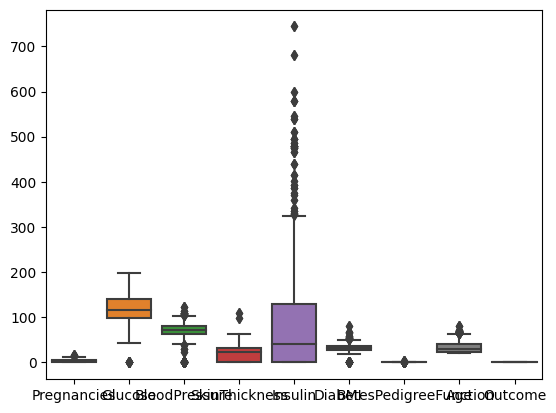

In [23]:
sns.boxplot(data=df)

In [24]:
df 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
#df.loc[df["BMI"==0,"BMI"]]=np.nan

<Axes: xlabel='BloodPressure', ylabel='Density'>

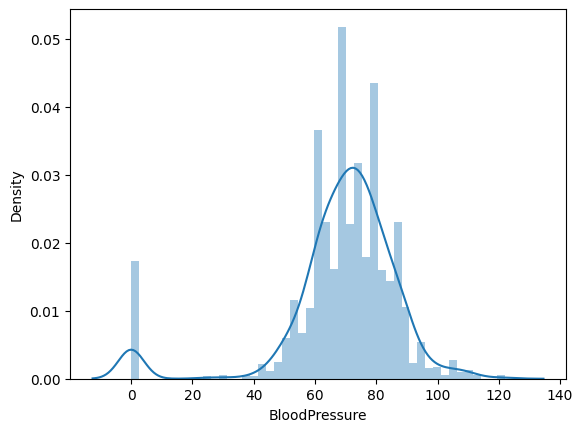

In [25]:
sns.distplot(df["BloodPressure"])

In [26]:
bp_median=df["BloodPressure"][df["BloodPressure"]!=0].median()
sk_median=df["SkinThickness"][df["SkinThickness"]!=0].median()
bmi_median=df["BMI"][df["BMI"]!=0].median()
print(bp_median,sk_median,bmi_median)


72.0 29.0 32.4


In [27]:
df["BloodPressure"]=df["BloodPressure"].replace(0,bp_median)
df["SkinThickness"]=df["SkinThickness"].replace(0,sk_median)
df["BMI"]=df["BMI"].replace(0,bmi_median)


In [28]:
print(len(df[df["BMI"]==0]))
print(len(df[df["BloodPressure"]==0]))
print(len(df[df["SkinThickness"]==0]))      

0
0
0


In [253]:
#from scipy.stats import mstats
#for i in df.columns:
#    df[i]=mstats.winsorize(df[i],limits=[0.1,0.1])

In [29]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [30]:
y=df["Outcome"]
x=df.drop("Outcome",axis=1)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=1000)                 

In [33]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
lg.score(x_test,y_test)             

0.788

In [36]:
ypred=lg.predict(x_test)

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(lg,x_test,y_test,cv=5)    


array([0.73, 0.81, 0.84, 0.76, 0.82])

In [38]:
param_grid={'C':[0.01,0.1,1,10,100],
            'penalty':["l1","l2"],
            'solver':["liblinear"]}

In [39]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(lg,param_grid,cv=5,scoring="accuracy")

In [40]:
grid.fit(x_train,y_train)    

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [41]:
grid.score(x_test,y_test)

0.776

In [42]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[290  30]
 [ 76 104]]


In [270]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))   

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       320
           1       0.78      0.58      0.66       180

    accuracy                           0.79       500
   macro avg       0.78      0.74      0.75       500
weighted avg       0.79      0.79      0.78       500



In [100]:
import pickle
with open("model_pickle",'wb') as f:
    pickle.dump(lg,f)         